# An Intro to Threading in Python

Multithreading is defined as the ability of a processor to execute multiple threads concurrently. In a simple, single-core CPU, it is achieved using frequent switching between threads. This is termed context switching. In context switching, the state of a thread is saved and the state of another thread is loaded whenever any interrupt (due to I/O or manually set) takes place. Context switching takes place so frequently that all the threads appear to be running parallelly (this is termed multitasking).

* Consider the diagram below in which a process contains two active threads: 

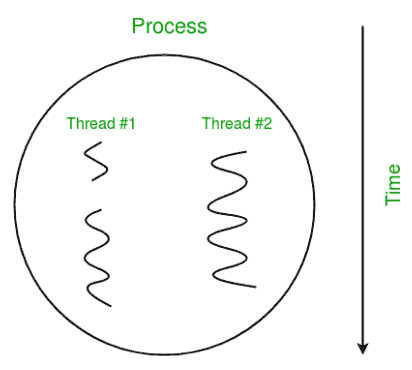


# Multithreading in Python
```
In Python, the threading module provides a very simple and intuitive API for spawning multiple threads in a program. Let us try to understand multithreading code step-by-step.

Step 1: Import Module

First, import the threading module.

-  import threading

Step 2: Create a Thread

To create a new thread, we create an object of the Thread class. It takes the ‘target’ and ‘args’ as the parameters. The target is the function to be executed by the thread whereas the args is the arguments to be passed to the target function.


-  t1 = threading.Thread(target, args)
-  t2 = threading.Thread(target, args)

Step 3: Start a Thread

To start a thread, we use the start() method of the Thread class.

-  t1.start()
-  t2.start()

Step 4: End the thread Execution

Once the threads start, the current program (you can think of it like a main thread) also keeps on executing. In order to stop the execution of the current program until a thread is complete, we use the join() method.

-  t1.join()
-  t2.join()

As a result, the current program will first wait for the completion of t1 and then t2. Once, they are finished, the remaining statements of the current program are executed.
```

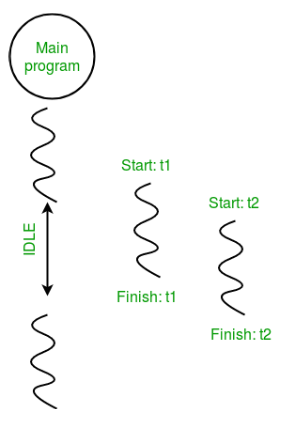

In [7]:
import time

def Cal_square(numbers):
    print('Calculating square of No')
    for i in numbers:
        time.sleep(0.2)
        print('square :', i*i)

def Cal_cube(numbers):
    print('calculating cube of No')
    for i in numbers:
        time.sleep(0.2)
        print('cube: ',i*i*i)

arr = [1,3,12,15]
t = time.time()
Cal_square(arr)
Cal_cube(arr)
print("Time taken to execute the program is ", (time.time()- t))


Calculating square of No
square : 1
square : 9
square : 144
square : 225
calculating cube of No
cube:  1
cube:  27
cube:  1728
cube:  3375
Time taken to execute the program is  1.6128652095794678


In [6]:
import time
import threading

def Cal_square(numbers):
    print('Calculating square of No')
    for i in numbers:
        time.sleep(0.2)
        print('square: ', i*i)

def Cal_cube(numbers):
    print('calculating cube of No')
    for i in numbers:
        time.sleep(0.2)
        print('cube: ',i*i*i)

arr = [1,3,12,15]
t = time.time()

t1 = threading.Thread(target=Cal_square,args=(arr,))
t2 = threading.Thread(target=Cal_cube,args=(arr,))

t1.start()
t2.start()

t1.join()   
t2.join()
print("Time taken to execute the program is ", (time.time()- t))


Calculating square of No
calculating cube of No
square:  1
cube:  1
square:  9
cube:  27
square:  144
cube:  1728
square:  225
cube:  3375
Time taken to execute the program is  0.8263149261474609


* The threading module in Python provides several classes and functions for working with threads. While there are many functions and methods available, the most commonly used methods for the Thread class in the threading module include:

- Thread(target, args=(), kwargs={}): Constructor to create a new thread. The target argument specifies the function to be run in the thread.

- start(): Starts the thread's activity. It must be called at most once per thread object.

- join(timeout=None): Waits until the thread terminates. This blocks the calling thread until the thread whose join() method is called is terminated.

- is_alive(): Returns True if the thread is alive, meaning it has been started and has not yet terminated.

- getName(): Returns the name of the thread.

- setName(name): Sets the name of the thread.

- ident: A unique identifier for the thread object.

- daemon: A boolean value indicating whether the thread is a daemon thread. Daemon threads are terminated when the program exits.

Besides these, there are other methods and functions for working with synchronization primitives such as locks, semaphores, and conditions, which are used for thread synchronization and communication. Examples of such methods include Lock.acquire(), Lock.release(), Semaphore.acquire(), Semaphore.release(), Condition.wait(), and Condition.notify().

# Python ThreadPool

* A thread pool is a collection of threads that are created in advance and can be reused to execute multiple tasks. The concurrent.futures module in Python provides a ThreadPoolExecutor class that makes it easy to create and manage a thread pool. 

* In this example, we define a function worker that will run in a thread. We create a ThreadPoolExecutor with a maximum of 2 worker threads. We then submit two tasks to the pool using the submit method. The pool manages the execution of the tasks in its worker threads. We use the shutdown method to wait for all tasks to complete before the main thread continues.

* Multithreading can help you make your programs more efficient and responsive. However, it’s important to be careful when working with threads to avoid issues such as race conditions and deadlocks.

In [1]:
import concurrent.futures

def worker():
	print("Worker thread running")

# create a thread pool with 2 threads
pool = concurrent.futures.ThreadPoolExecutor(max_workers=2)

# submit tasks to the pool
pool.submit(worker)
pool.submit(worker)

# wait for all tasks to complete
pool.shutdown(wait=True)
print("Main thread continuing to run")


Worker thread running
Worker thread running
Main thread continuing to run


In Python's `threading` module, you can set a thread as a daemon thread using the `daemon` attribute. Daemon threads are background threads that automatically exit when the main program finishes executing. Daemon threads are useful for tasks that need to run in the background and are not critical to the application's functionality. Here's how you can use the `daemon` attribute:

```python
import threading
import time

def daemon_function():
    while True:
        print("Daemon thread is running...")
        time.sleep(1)

# Create a daemon thread
daemon_thread = threading.Thread(target=daemon_function)
daemon_thread.daemon = True  # Set the thread as daemon

# Start the daemon thread
daemon_thread.start()

# The main program continues to execute
time.sleep(5)  # Let the main program run for 5 seconds

print("Main program is done.")
```

In this example, the `daemon_function` runs indefinitely in a loop printing a message every second. The `daemon_thread.daemon = True` line sets the `daemon_thread` as a daemon thread. Even though the main program continues to run for 5 seconds, the daemon thread will run in the background. If you don't set the daemon attribute to `True`, the daemon thread would prevent the program from exiting until it completes its task.

When you run this code, you'll notice that the program exits after 5 seconds even though the daemon thread is still running. The daemon thread automatically terminates when the main program finishes executing.

In [30]:
import concurrent.futures
count = 1
def worker():
    global count
    print('the worker fuction is been called')
    print(count)
    count+=1

pool = concurrent.futures.ThreadPoolExecutor(max_workers=3)

pool.submit(worker)
pool.submit(worker)
pool.submit(worker)


pool.shutdown(wait=True)


the worker fuction is been called
1
the worker fuction is been called
2
the worker fuction is been called
3
